# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [179]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

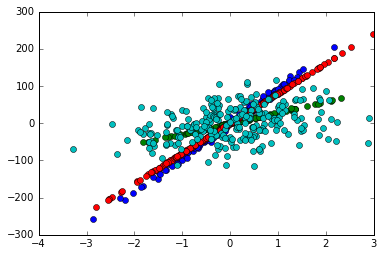

In [180]:
from sklearn.datasets import make_regression

noise = 7 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1

#Dataset number 1; original dataset
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o')



#Dataset number 2; varied noise
(x2,y2) = make_regression(n_samples=100, n_features=n_dimensions, noise=1)
(x2_test,y2_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=1)
plt.plot(x2,y2,'o')

#Dataset number 3;
(x3,y3) = make_regression(n_samples=250, n_features=n_dimensions, noise=0)
(x3_test,y3_test) = make_regression(n_samples=125, n_features=n_dimensions, noise=0)
plt.plot(x3, y3, 'o')

#Dataset number 4; varied noise
(x4,y4) = make_regression(n_samples=250, n_features=n_dimensions, noise=40)
(x4_test,y4_test) = make_regression(n_samples=125, n_features=n_dimensions, noise=40)
plt.plot(x4, y4, 'o')

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

-2.06697665241


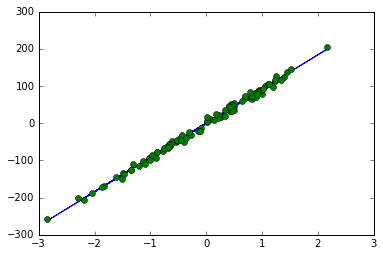

0.564543336599


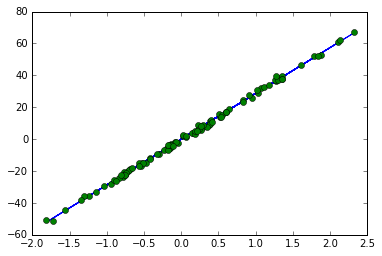

0.990640602606


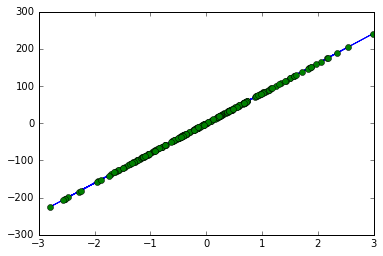

0.209473661003


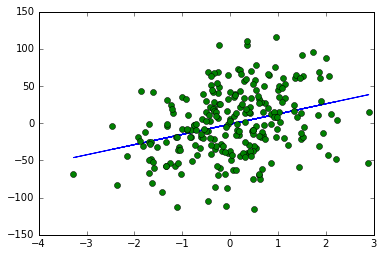

In [181]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()


## Dataset NUMBER 1

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()


## Dataset NUMBER 2

#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print regr.score(x2_test,y2_test)

#Plot the resulting line
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()


## Dataset NUMBER 3

#Fit the regression object on the data
regr.fit(x3,y3)

#Print the score that the fit has
print regr.score(x3_test,y3_test)

#Plot the resulting line
plt.plot(x3,regr.predict(x3))
plt.plot(x3,y3,'o')
plt.show()


## Dataset NUMBER 4

#Fit the regression object on the data
regr.fit(x4,y4)

#Print the score that the fit has
print regr.score(x4_test,y4_test)

#Plot the resulting line
plt.plot(x4,regr.predict(x4))
plt.plot(x4,y4,'o')
plt.show()

## Your analysis
What is the effect on the score of varying the amount of noise?

The larger the noise, the more the datapoints are distributed over a larger range of values; the datapoints are more scattered when the noise becomes large. Hence, one could conclude that the larger the noise, the more the score differs from it's "perfect" value of 1, as coherence between the datapoints is harder to find. However, this is not always the case as positive and negative differences when calculating the score can cancel each other out. 

All with all, the effect of varying the amount of noise on the score is that the score becomes 'less saying', in the sense that it's weight becomes less.

-0.4835238422


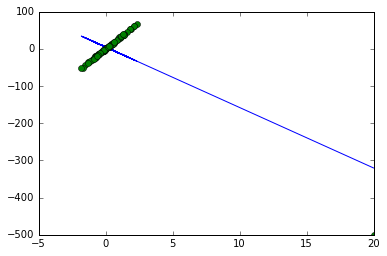

In [182]:
#Add a serious outlier and see what happens

#Example of creating big outlier:
x2[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y2[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.

#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print regr.score(x2_test,y2_test)

#Plot the resulting line
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.show()

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [183]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    # The hypothesis/prediction function according to it's general form
    h = theta0 + theta1*x
    
    return h

In [184]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    # The size of our training dataset
    m = y.size
    
    # The cost function according to it's general formula
    J = sum((x_predict - y)**2) / (2*m)
    
    return J

In [185]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y, x):
    # The size of our training dataset
    m = y.size
    
    # The P. derivative of the cost function wrt theta0 and theta1; for simplicity, just theta1 in this case
    gradient_value = sum((x_predict - y)*x) / m
    
    return gradient_value

19.9233176015
91.4379567165


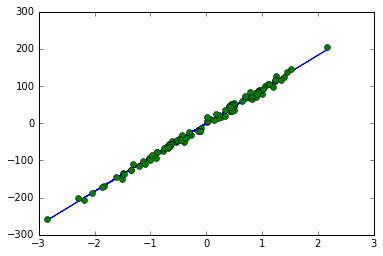

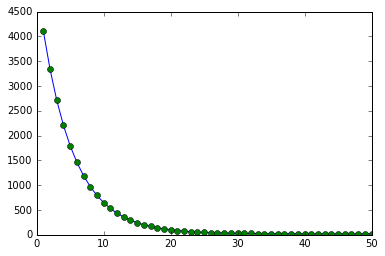

In [244]:
#learning rate
alpha = 0.1

#initial values parameters
theta0 = 0
theta1 = 1

#define x and y as the created dataset and 'resize' the shape of x
x = x1
x = np.squeeze(x)
y = y1

iterations = 50
stopcondition = 3

#Empty arrays to store cost fuction at each iteration
MyCostArray = []
MyIterArray = []

#initial values
i = 0
cost = 100

#Gradient descent algorithm; we repeat until convergence
while (i < iterations) and (cost > stopcondition):
    #Loop trough iterations
    i = i +1
    
    #The prediction value
    h = prediction_function(x,theta0,theta1)
    
    #The cost value
    cost = cost_function(h,y)
    
    #Save the output of the cost function at each iteration
    MyCostArray.append(cost)
    MyIterArray.append(i)
    
    #The gradient values for theta0 and theta1; for theta0 we let x=1 since 
    #there is no multiplication by x involved for theta0
    gradient_value_theta0 = compute_gradient(h,y,1)
    gradient_value_theta1 = compute_gradient(h,y,x)
    
    #Compute the updated theta0 and theta1 values according to gradient descent
    theta0 = theta0 - (alpha * gradient_value_theta0)
    theta1 = theta1 - (alpha * gradient_value_theta1)
    
print cost
print theta1
    
#Plot the data and the linear regression
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

#Plot the output of the cost function at each iteration
plt.plot(MyIterArray,MyCostArray)
plt.plot(MyIterArray,MyCostArray,'o')
plt.show()

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

The amount of iterations necessary to obtain a good result differs siginificantly with different learning rates; the larger a learning rate is, the less iterations are necessary to obtain a good results. For example, with a learning rate of 0.01, there are approximately 500 iterations necessary for a good result, while with a learning rate of 0.1 there are only 50 needed.

Now, we can conclude what the influence of the learning rate is, which is: the larger the learning rate, the faster a good result CAN be obtained. However, this can be tricky, as with learning rates too big the gradient descent might fail to converge and diverge instead.

The trend of the cost function shows that after certain amounts of iterations the difference in cost value is only small; after a certain amount of iterations, the following iterations become less and less effective. You can see this from the trend because the trend is asymptotically approaching 0.

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

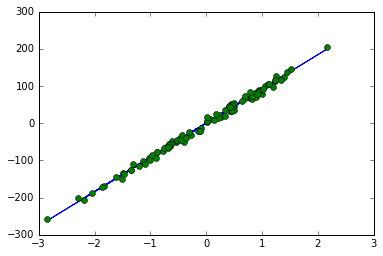

In [246]:
#Leave theta0 to be 0
theta0 = 0

#define the transpose of x
x_transpose = np.transpose(x)

#The inverse of the dotproduct of x_transpose and x
x_t_dot_inv = 1 / (np.dot(x_transpose,x))

#The product of x_transpose and y
x_t_y = np.dot(x_transpose,y)

#Define theta1 as the dot product of x_t_dot_inv and x_t_y
theta1 = np.dot(x_t_dot_inv,x_t_y)

#Plot the data as dots and the prediction as a blue line
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

